### Library import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

### Load data

In [2]:
data = pd.read_csv("../Experiments/Data/train.csv")
data.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


### 기초 통계량 확인

In [3]:
data.describe(include='all')

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
count,59299.000000,58317,59299,14568.000000,59299.000000,15338,59299,13756.000000,3444.0,1121.0,...,59299,28436,59299.000000,59299.000000,18417.000000,15304.000000,18417,5526,59299.000000,59299
unique,NaN,15399,5,NaN,NaN,33,2,NaN,NaN,NaN,...,53,449,NaN,NaN,NaN,NaN,12,86,NaN,2
top,NaN,//India,ID,NaN,NaN,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,NaN,NaN,NaN,NaN,corporate / office,Others,NaN,False
freq,NaN,3037,25563,NaN,NaN,6647,37783,NaN,NaN,NaN,...,16908,17250,NaN,NaN,NaN,NaN,4097,1740,NaN,54449
mean,0.634593,NaN,NaN,0.091685,27114.556333,NaN,NaN,19.912184,1.0,1.0,...,NaN,NaN,0.041603,0.050810,0.001117,0.049288,NaN,NaN,262.563888,NaN
std,0.286066,NaN,NaN,0.150988,14653.911888,NaN,NaN,44.697938,0.0,0.0,...,NaN,NaN,0.199681,0.219612,0.001104,0.027949,NaN,NaN,231.605681,NaN
min,0.000000,NaN,NaN,0.003788,2.000000,NaN,NaN,0.000000,1.0,1.0,...,NaN,NaN,0.000000,0.000000,0.000002,0.011583,NaN,NaN,0.000000,NaN
25%,0.500000,NaN,NaN,0.019900,14913.000000,NaN,NaN,1.000000,1.0,1.0,...,NaN,NaN,0.000000,0.000000,0.000298,0.026846,NaN,NaN,97.000000,NaN
50%,0.500000,NaN,NaN,0.049180,26774.000000,NaN,NaN,4.000000,1.0,1.0,...,NaN,NaN,0.000000,0.000000,0.000572,0.049840,NaN,NaN,175.000000,NaN
75%,1.000000,NaN,NaN,0.074949,40368.500000,NaN,NaN,19.000000,1.0,1.0,...,NaN,NaN,0.000000,0.000000,0.001183,0.064566,NaN,NaN,374.000000,NaN


### 결측치 확인

<Axes: >

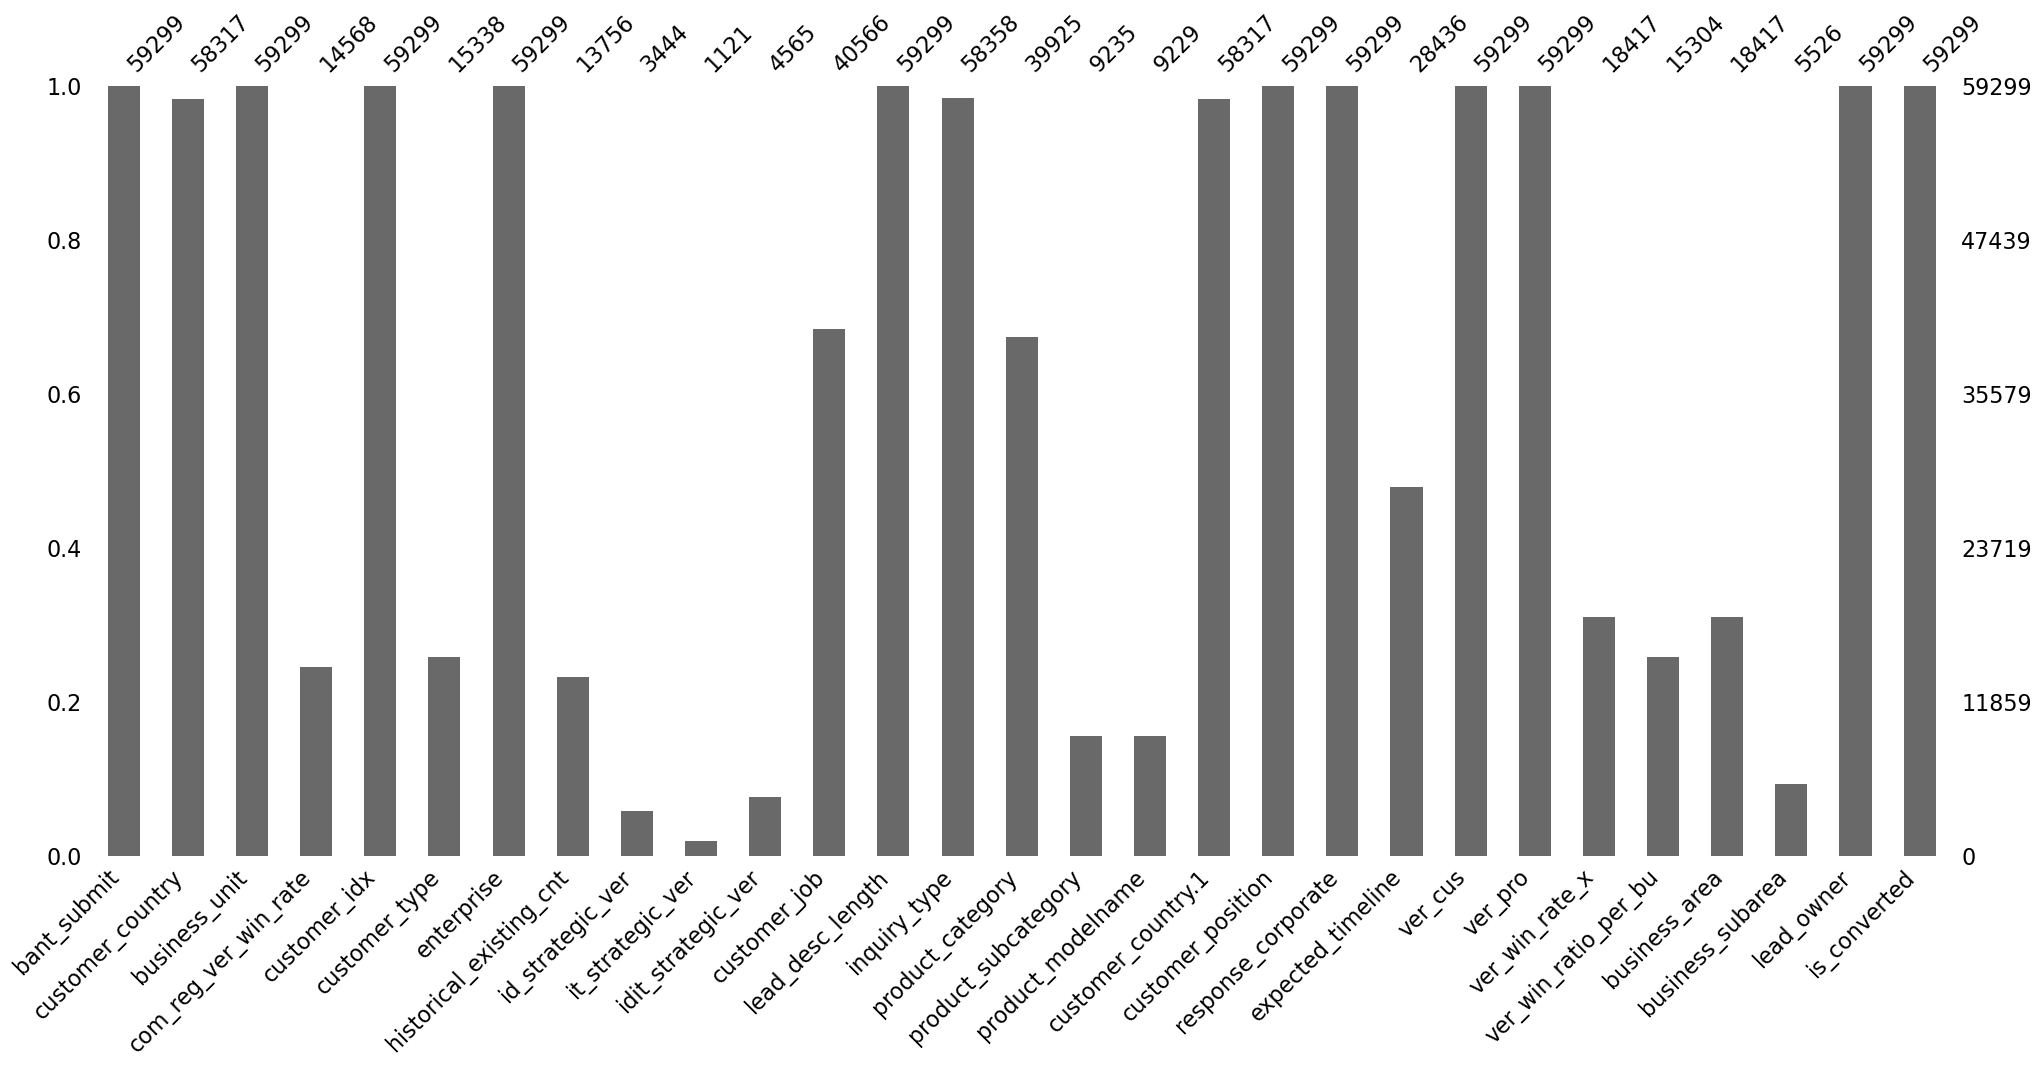

In [4]:
msno.bar(data)

In [5]:
# 결측치 비율
df = data.isna().sum() / len(data)
df = pd.DataFrame(df, columns=['nan_ratio'])
high_nan_features = df[df['nan_ratio'] >= 0.5].index.values
print(len(high_nan_features))
high_nan_features

13


array(['com_reg_ver_win_rate', 'customer_type', 'historical_existing_cnt',
       'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver',
       'product_subcategory', 'product_modelname', 'expected_timeline',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea'], dtype=object)

- 28개의 feature 중 13개의 feature가 결측치 비율이 0.5가 넘는다. -> feature 자체를 삭제해야 하는가?

### Feature 분석

In [6]:
for feat_name in data.columns:
    tmp = data[feat_name].unique()

    info = ''
    if feat_name in high_nan_features:
        info = ' (high_nan)'

    print(f'feature: {feat_name + info:35} | num_category: {len(tmp):10} | examples: {tmp[:3]}')
    print('-' * 20)

feature: bant_submit                         | num_category:          5 | examples: [1.   0.75 0.5 ]
--------------------
feature: customer_country                    | num_category:      15400 | examples: ['/Quezon City/Philippines' '/PH-00/Philippines' '/Kolkata /India']
--------------------
feature: business_unit                       | num_category:          5 | examples: ['AS' 'ID' 'IT']
--------------------
feature: com_reg_ver_win_rate (high_nan)     | num_category:         81 | examples: [0.06666667 0.08888889 0.04081633]
--------------------
feature: customer_idx                        | num_category:      35112 | examples: [32160 23122  1755]
--------------------
feature: customer_type (high_nan)            | num_category:         34 | examples: ['End-Customer' 'Specifier/ Influencer' 'Service Partner']
--------------------
feature: enterprise                          | num_category:          2 | examples: ['Enterprise' 'SMB']
--------------------
feature: historical_existing

| Field | 설명 | 결측치 비율 | 예시 | 비고 |
| --- | --- | --- | --- | --- |
| bant_submit | MQL 구성 요소들 중 [1]Budget(예산), [2]Title(고객의 직책/직급), [3]Needs(요구사항), [4]Timeline(희망 납기일) 4가지 항목에 대해서 작성된 값의 비율 | 0.000000 | [1.   0.75 0.5  0.25 0.  ] |  |
| customer_country | 고객의 국적 (도시와 같은 세부 정보로 인해 overfitting이 발생할 수 있으므로, 세부 정보는 버리는 게 좋을듯) | 0.016560 | ['/Quezon City/Philippines' ...] | 인도 고객이 제일 많음 |
| business_unit | MQL 요청 상품에 대응되는 사업부 | 0.000000 | ['AS' 'ID' 'IT' 'Solution' 'CM'] |  |
| com_reg_ver_win_rate | Vertical Level 1, business unit, region을 기준으로 oppty 비율을 계산 | 0.754330 | [0.06666667 0.08888889 0.04081633 0.00393701        nan …] |  |
| customer_idx | 고객의 회사명 (회사 종류가 상당히 많아 overfitting 발생 소지 다분함) | 0.000000 | [32160 23122  1755 ... 19249 40327 30268] | 회사 고유 번호인 것 같음 |
| customer_type | 고객 유형 | 0.741345 | 'End-Customer' 'Specifier/ Influencer', ‘Etc’ | 종류가 많지는 않음 |
| enterprise | Global 기업인지, Small/Medium 규모의 기업인지 | 0.000000 | ['Enterprise' 'SMB'] |  |
| historical_existing_cnt | 이전에 Converted(영업 전환) 되었던 횟수 | 0.768023 | nan, 1.200e+01, 1.440e+02 | 중요한 feature인데, 결측치가 너무 많음 |
| id_strategic_ver | (도메인 지식) 특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여 | 0.941921 | [nan  1.] |  |
| it_strategic_ver | (도메인 지식) 특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여 | 0.981096 | [nan  1.] |  |
| idit_strategic_ver | Id_strategic_ver이나 it_strategic_ver 값 중 하나라도 1의 값을 가지면 1 값으로 표현 | 0.923017 | [nan  1.] |  |
| customer_job | 고객의 직업군 | 0.315908 | ['purchasing' 'media and communication' 'engineering' | 매우 다양함 |
| lead_desc_length | 고객이 작성한 Lead Descriptoin 텍스트 총 길이 | 0.000000 | 62, 96, 56, 44, 97 |  |
| inquiry_type | 고객의 문의 유형 | 0.015869 | 'Quotation or purchase consultation' | 제 2 외국어로 작성된 것도 있음 |
| product_category | 요청 제품 카테고리 | 0.326717 | 'multi-split' 'single-split' | 종류 엄청 많고, 제 2 외국어로 작성된 것도 있음 |
| product_subcategory | 요청 제품 하위 카테고리 | 0.844264 | nan 'New High Haze UHD Standard Signage' | 종류 엄청 많고, 제 2 외국어로 작성된 것도 있음 |
| product_modelname | 요청 제품 모델명 | 0.844365 | nan '98UH5J-H' '75XS4G' '86TR3DK' | 종류 엄청 많음 |
| customer_country.1 | 담당 자사 법인명 기반의 지역 정보 (customer_country랑 거의 똑같아서, 삭제해도 무방할 것 같음) | 0.016560 | '/Quezon City/Philippines' '/PH-00/Philippines' |  |
| customer_position | 고객의 회사 직책 | 0.000000 | 'entry level' 'ceo/founder' | 종류 많음 |
| response_corporate | 담당 자사 법인명 | 0.000000 | 'LGEPH' 'LGEIL' 'LGEAF' |  |
| expected_timeline | 고객의 요청한 처리 일정 | 0.520464 | less than 3 months' nan '3 months ~ 6 months' | 자연어라서, 쓸거면 NLP 기술 써야 할 듯 |
| ver_cus | 특정 Vertical Level 1(사업영역) 이면서 Customer_type(고객 유형)이 소비자(End-user)인 경우에 대한 가중치 | 0.000000 | [1 0] |  |
| ver_pro | 특정 Vertical Level 1(사업영역) 이면서 특정 Product Category(제품 유형)인 경우에 대한 가중치 | 0.000000 | [0 1] |  |
| ver_win_rate_x | 전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 영업 전환 성공 비율 값을 곱한 값 | 0.689421 | 3.07928766e-03, nan, 5.71955128e-04 |  |
| ver_win_ratio_per_bu | 특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산 | 0.741918 | 0.06407035, 0.02263374 |  |
| business_area | 고객의 사업 영역 | 0.689421 | 'corporate / office' nan 'education' |  |
| business_subarea | 고객의 세부 사업 영역 | 0.906811 | 'Engineering' 'Advertising' 'Construction' |  |
| lead_owner | 영업 담당자 이름 | 0.000000 | 0, 1, 2, 3 | encoding이 되어있음 |
| is_converted | 영업 성공 여부. True일 시 성공. | 0.000000 | [True, False] |  |

`is_converted` column 분포 확인

is_converted
False    54449
True      4850
Name: count, dtype: int64


<Axes: xlabel='is_converted', ylabel='count'>

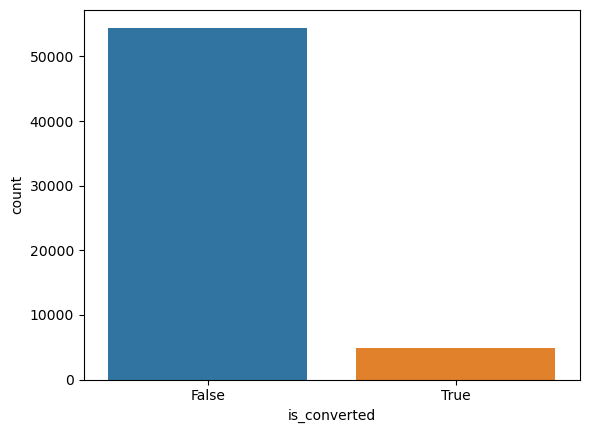

In [25]:
print(data['is_converted'].value_counts())
sns.countplot(x='is_converted', data=data)

- 정답 데이터의 분포를 보면, `is_converted == True` 인 고객, 즉 **영업을 성공한 고객의 비율이 매우 낮다.** -> **극단적인 분포를 가지는 분류 문제**이기 때문에, 이를 해결할 방법을 고민해보아야 함.
- 위와 같은 분포를 가지는 data를 바탕으로 모델을 학습시킨다면, unseen data가 입력되었을 때 예측 결과는 대부분이 False일 확률이 높음.
- **높은 Precision 과 낮은 Recall 값을 가지는 모델이 만들어질 확률이 높음.**
    - 애초에 `is_converted == True` 라고 예측하는 경우의 수가 적기 때문에, FP가 낮음 -> high precision
    - 반면에 `is_converted == False` 라고 예측하는 경우의 수는 많기 때문에, FN이 높음 -> low recall

- validation set을 만들 때, `is_converted == True` 와 `is_converted == False` 인 data의 비율을 맞춰주는 것이 좋을 것 같음. 그래야 test set 과 성능 비교가 될 것으로 보임. (현재는 너무 극단적인 분포를 보임)
- `is_converted == True` 와 `is_converted == False` data를 구분할 수 있는 feature engineering이 중요할 것 같음.
---

29개의 feature 분포 확인
- 범주형 변수들도 존재하기 때문에, 수치형 변수로 변환한 뒤 분포를 확인
- 결측치는 일단 0으로 채우고, 결측치가 많은 feature의 경우 title을 빨간색으로 표시

In [8]:
import os
import warnings

warnings.filterwarnings('ignore')
os.chdir("C:/Users/project/competitions/24-LG-Aimers-Phase2")

In [9]:
from Experiments.preprocessing import label_encoding, normalize_country_name

tr_data, _ = label_encoding(data, pd.read_csv("./Experiments/Data/submission.csv"))
tr_data = tr_data.fillna(0)

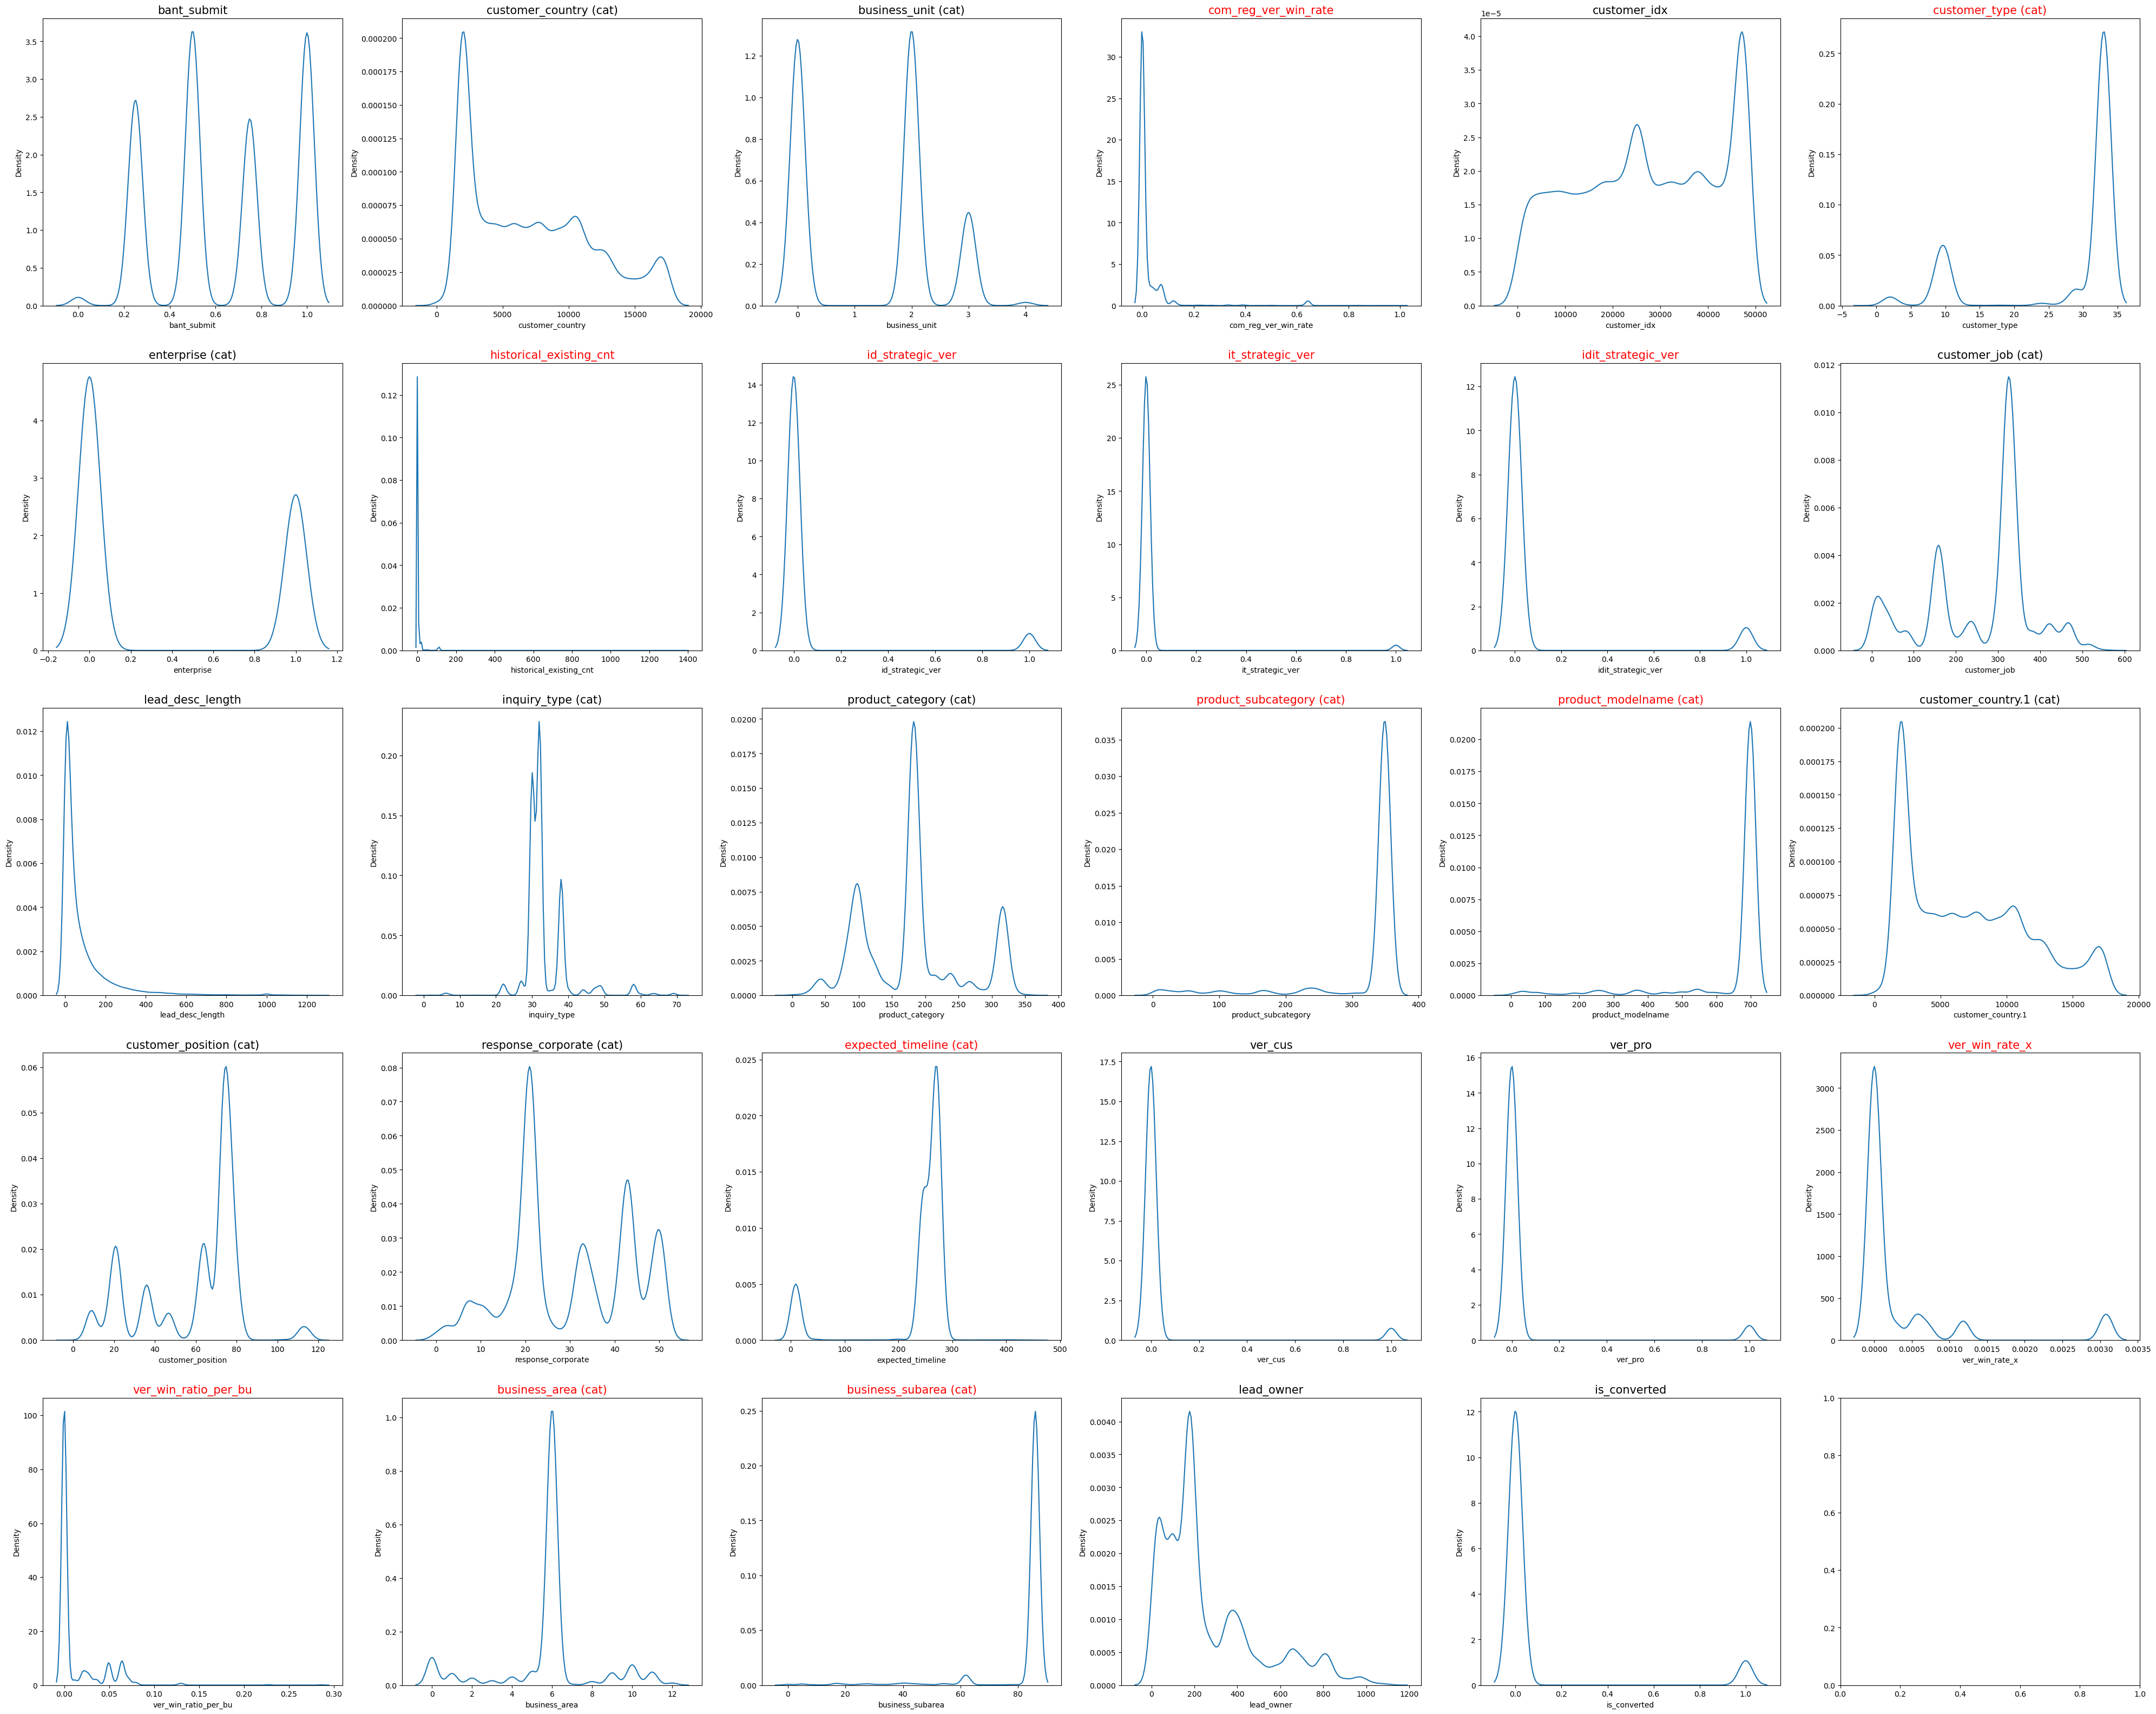

In [10]:
fig, ax = plt.subplots(5, 6, figsize=(50, 40))
cat_features = ["customer_country", "business_subarea", "business_area", "business_unit", "customer_type", "enterprise", "customer_job", "inquiry_type", "product_category", "product_subcategory", "product_modelname", "customer_country.1", "customer_position", "response_corporate","expected_timeline"]

count = 0
columns = tr_data.columns
for row in range(5):
    for col in range(6):
        sns.kdeplot(data=tr_data[columns[count]], ax=ax[row][col])

        color = 'black'
        if columns[count] in high_nan_features:
            color = 'red'

        is_cat = ''
        if columns[count] in cat_features:
            is_cat = ' (cat)'

            
        ax[row][col].set_title(columns[count] + is_cat, fontsize=15, color=color)

        if count == 28:
            break

        count += 1

1. `customer_country` feature의 경우 normalize 작업이 필요할 것으로 보인다. (국가 정보를 제외한 나머지 정보는 삭제)
1. `customer_idx` feature를 사용할지 고민해볼 필요가 있다.
1. `customer_country` 와 `customer_country.1` feature 가 상당히 유사하므로, 둘 중 하나를 제거하는 것이 좋을 것 같다.
1. 한 쪽으로 치우쳐져 있는 feature 들이 존재하는데, 이를 정규화할 지 고민해보아야 한다. (수치형, 범주형 상관없이 label encoding 이후에는 정규화해도 상관이 없나?)
---

**`customer_country` feature 정규화 이전 / 이후 분포 확인**
- 정규화 이전에는 값이 너무 다양해서 train data에 overfitting 될 확률이 높아 보인다.
- 정규화 이전 / 이후 feature 분포를 확인하여, 정규화 적용 여부에 대해 판단한다.
    - 정규화 이후의 feature 분포를 확인했을 때, 영업 전환 여부에 따른 분포 차이가 사라진다면 정규화를 하지 않는 것이 나을 수 있다.

In [54]:
df_tr, df_tt = pd.read_csv("./Experiments/Data/train.csv"), pd.read_csv("./Experiments/Data/submission.csv")

In [56]:
# 정규화 이전
df_tr_cp, df_tt_cp = label_encoding(df_tr, df_tt, features=['customer_country'])

bef_norm_is_cvt = df_tr_cp[df_tr_cp['is_converted'] == True]['customer_country']
bef_norm_not_cvt = df_tr_cp[df_tr_cp['is_converted'] == False]['customer_country']

In [57]:
# 정규화 이후
df_tr_cp, df_tt_cp = df_tr.copy(), df_tt.copy()

df_tr_cp['customer_country'] = normalize_country_name(df_tr_cp['customer_country'])
df_tt_cp['customer_country'] = normalize_country_name(df_tt_cp['customer_country'])

df_tr_cp, _ = label_encoding(df_tr_cp, df_tt_cp, features=['customer_country'])

aft_norm_is_cvt = df_tr_cp[df_tr_cp['is_converted'] == True]['customer_country']
aft_norm_not_cvt = df_tr_cp[df_tr_cp['is_converted'] == False]['customer_country']

Text(0.5, 1.0, 'After normalize')

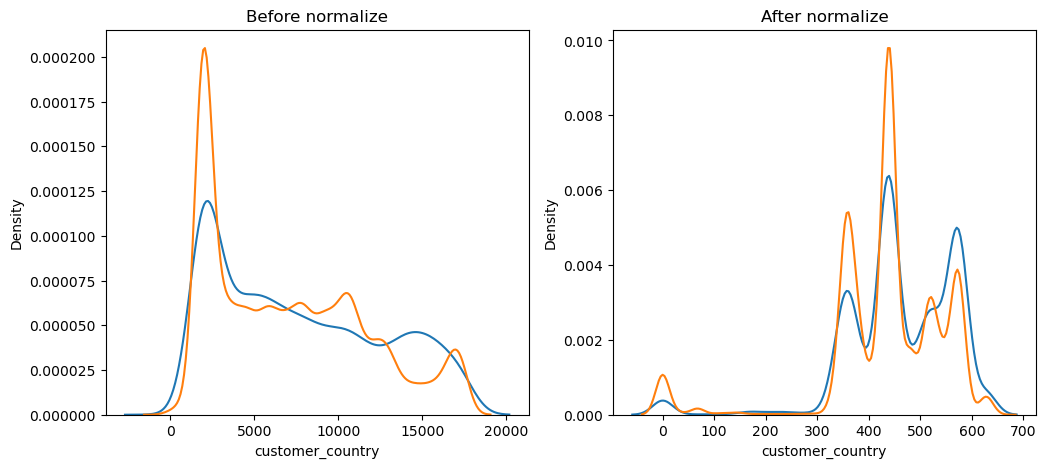

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(bef_norm_is_cvt, ax=ax[0])
sns.kdeplot(bef_norm_not_cvt, ax=ax[0])
ax[0].set_title('Before normalize')

sns.kdeplot(aft_norm_is_cvt, ax=ax[1])
sns.kdeplot(aft_norm_not_cvt, ax=ax[1])
ax[1].set_title('After normalize')

- 정규화 이전 / 이후 `customer_country` feature의 분포를 `is_converted` 여부에 따라 시각화했을 때, True (파란색) 와 False (주황색) 간의 차이가 분명히 존재한다. -> 정규화를 해도 괜찮을 것 같다.
---

**`is_converted == True` 와 `is_converted == False` data를 구분하여, feature 시각화**

In [18]:
is_converted = tr_data[tr_data['is_converted'] == True]
not_converted = tr_data[tr_data['is_converted'] == False]

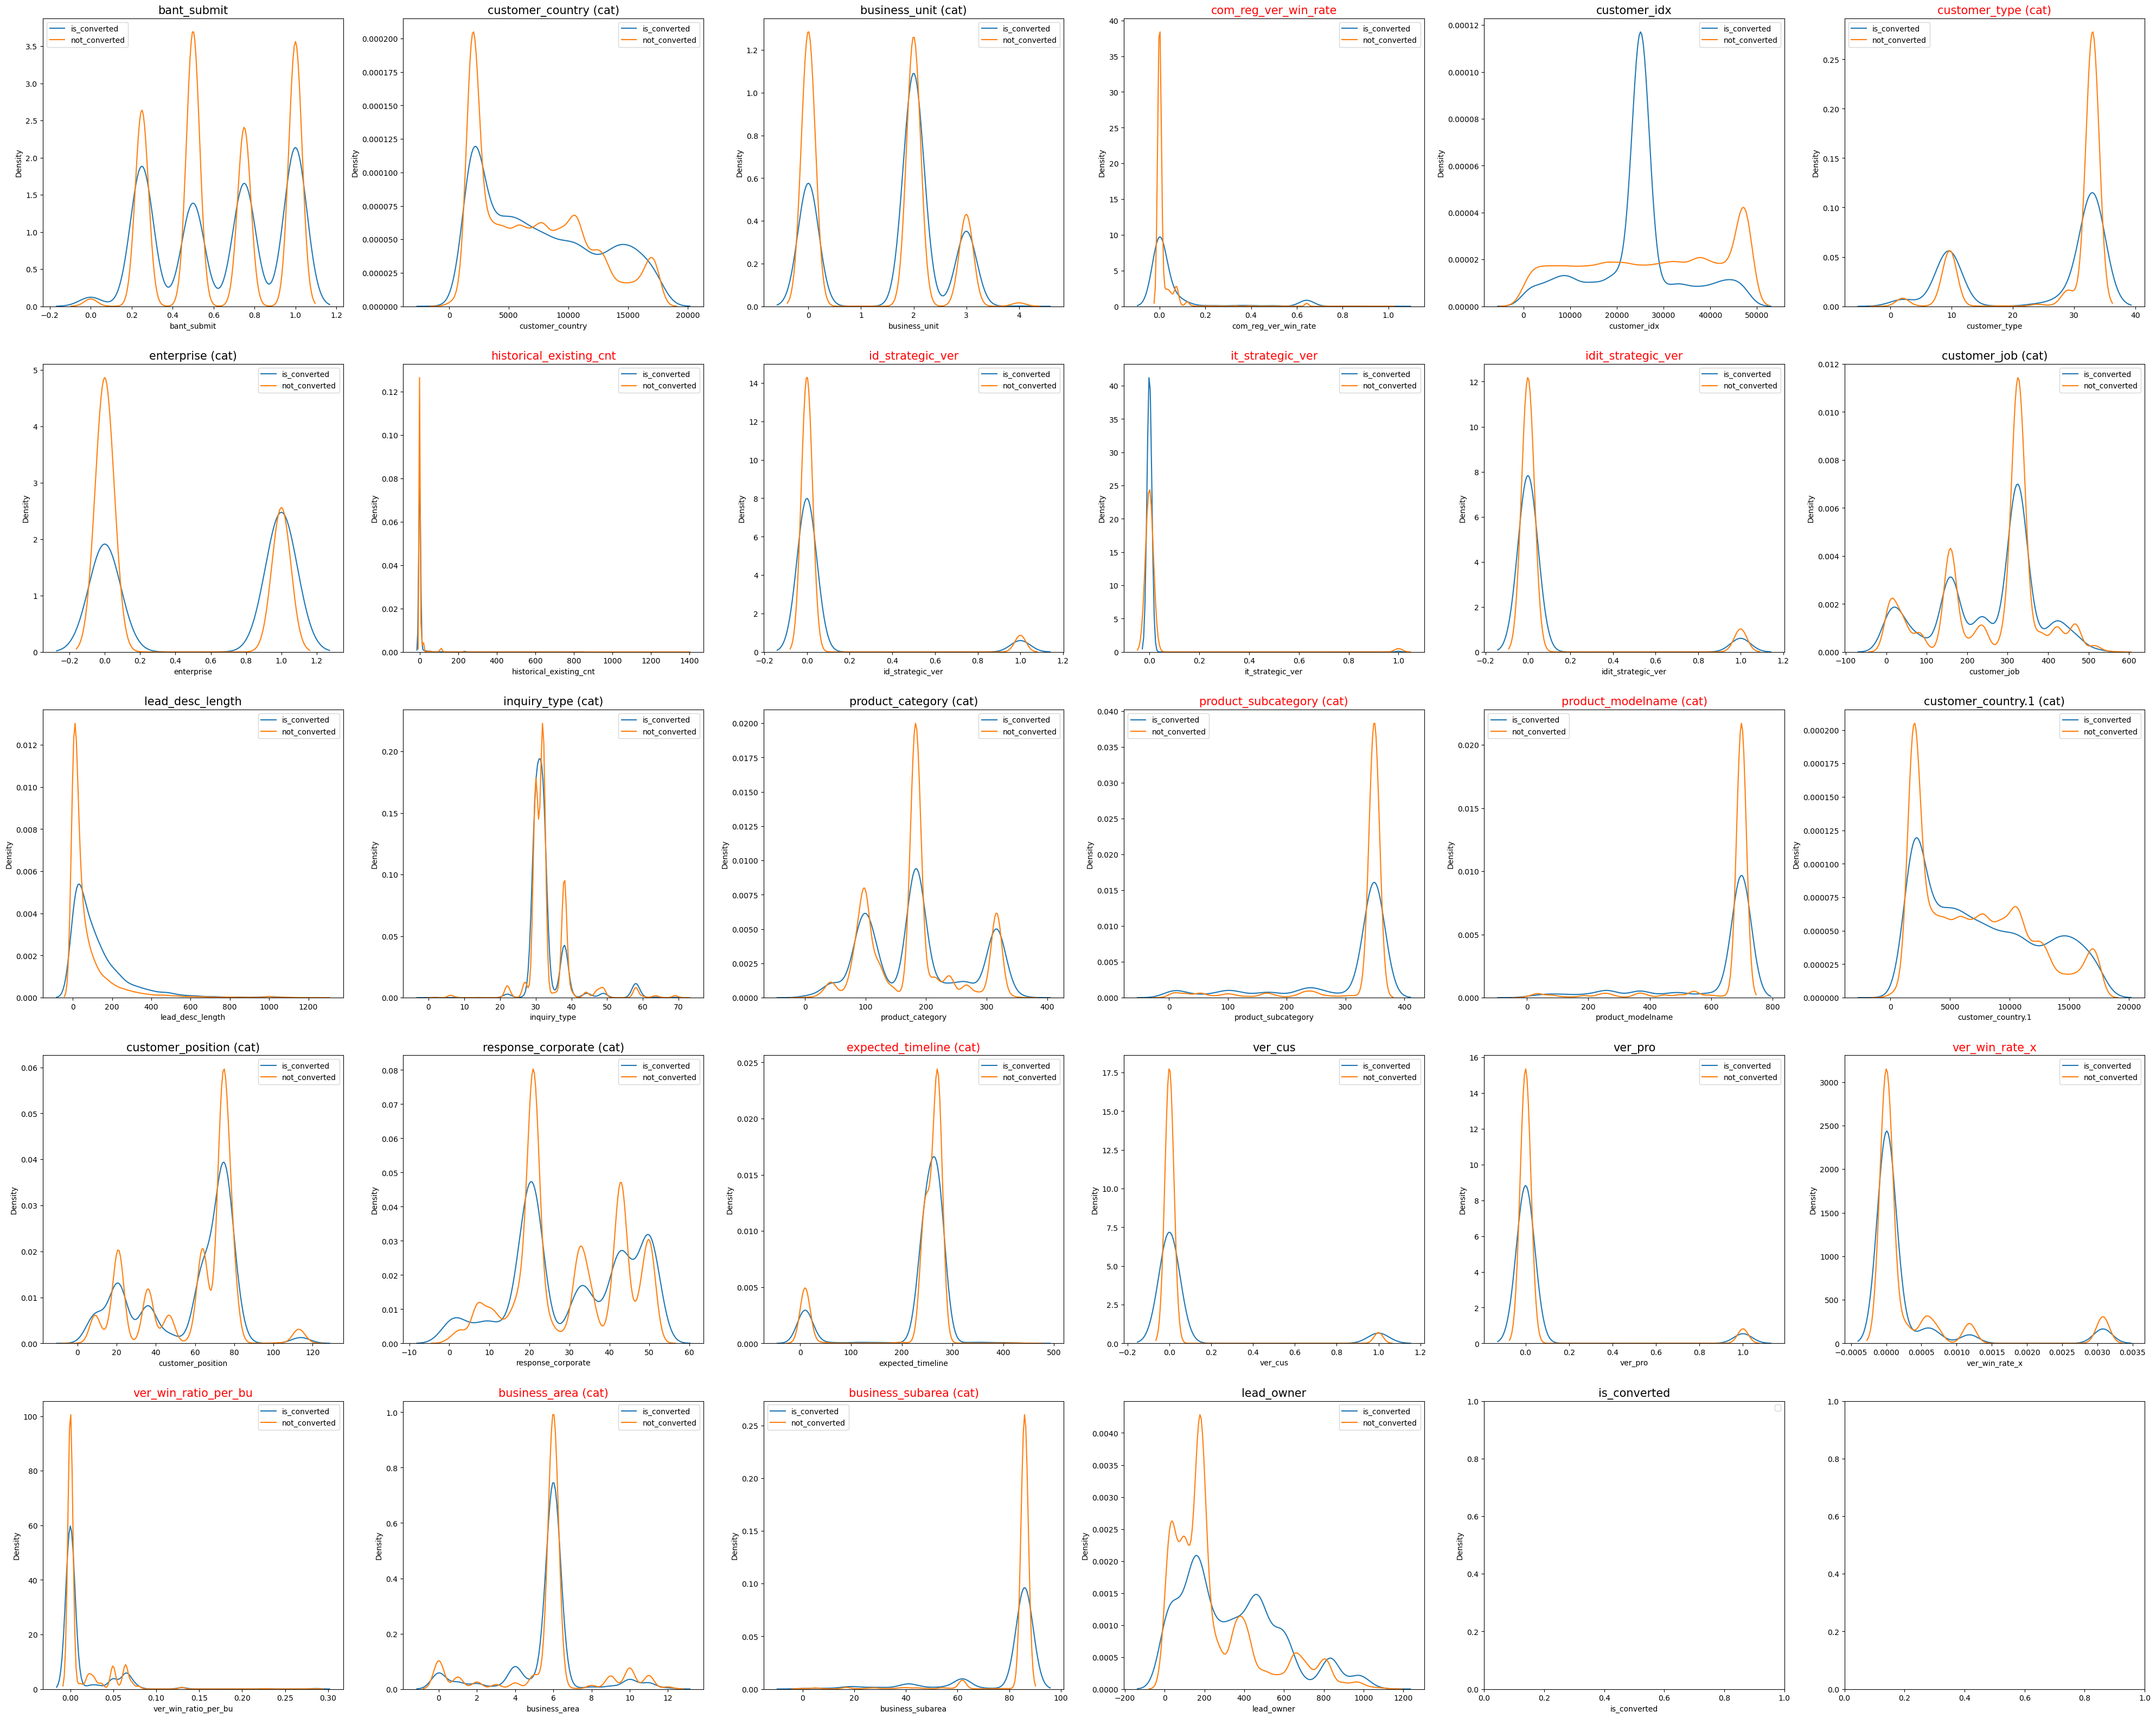

In [24]:
fig, ax = plt.subplots(5, 6, figsize=(50, 40))
cat_features = ["customer_country", "business_subarea", "business_area", "business_unit", "customer_type", "enterprise", "customer_job", "inquiry_type", "product_category", "product_subcategory", "product_modelname", "customer_country.1", "customer_position", "response_corporate","expected_timeline"]

count = 0
columns = tr_data.columns
for row in range(5):
    for col in range(6):
        # is_converted == True
        sns.kdeplot(data=is_converted[columns[count]], ax=ax[row][col])

        # is_converted == False
        sns.kdeplot(data=not_converted[columns[count]], ax=ax[row][col])

        color = 'black'
        if columns[count] in high_nan_features:
            color = 'red'

        is_cat = ''
        if columns[count] in cat_features:
            is_cat = ' (cat)'

            
        ax[row][col].set_title(columns[count] + is_cat, fontsize=15, color=color)
        ax[row][col].legend(['is_converted', 'not_converted'])


        if count == 28:
            break

        count += 1

- `com_reg_ver_win_rate` 의 경우 결측치 비율이 너무 높은 것 같아서 feature를 삭제하려 했는데, 결측치를 0으로 채우고 나서 분포를 확인해보니 결측치의 대부분이 `is_converted == False` 데이터에 있는 것으로 보인다. -> 오히려 예측에 도움이 되는 feature일 수 있다.
- `is_converted == True` 에 존재하는 결측치와 `is_converted == False` 에 존재하는 결측치를 따로 보아야 할 것 같다. (무작정 결측치가 많은 데이터를 버리지 않기 위해서)
---

**`is_converted` 에 따른 결측치 확인**

In [87]:
is_converted = data[data['is_converted'] == True]
not_converted = data[data['is_converted'] == False]

tmp_is_converted = pd.DataFrame(is_converted.isna().sum() / len(is_converted), columns=['True'])
tmp_not_converted = pd.DataFrame(not_converted.isna().sum() / len(not_converted), columns=['False'])

tmp = pd.concat([tmp_is_converted, tmp_not_converted], axis=1)
tmp

,True,False
bant_submit,0.000000,0.000000
customer_country,0.027835,0.015556
business_unit,0.000000,0.000000
com_reg_ver_win_rate,0.738969,0.755698
customer_idx,0.000000,0.000000
customer_type,0.597113,0.754192
enterprise,0.000000,0.000000
historical_existing_cnt,0.862268,0.759628
id_strategic_ver,0.930928,0.942901
it_strategic_ver,0.997320,0.979651


- `is_converted == False` 인 샘플이 압도적으로 많아서 그렇지, 전체 데이터에 대한 결측치의 비율로 따지면 큰 차이가 나지는 않는다. -> 결측치가 많은 feature 들은 그냥 삭제해도 괜찮지 않을까..

### 상관관계 분석

<Axes: >

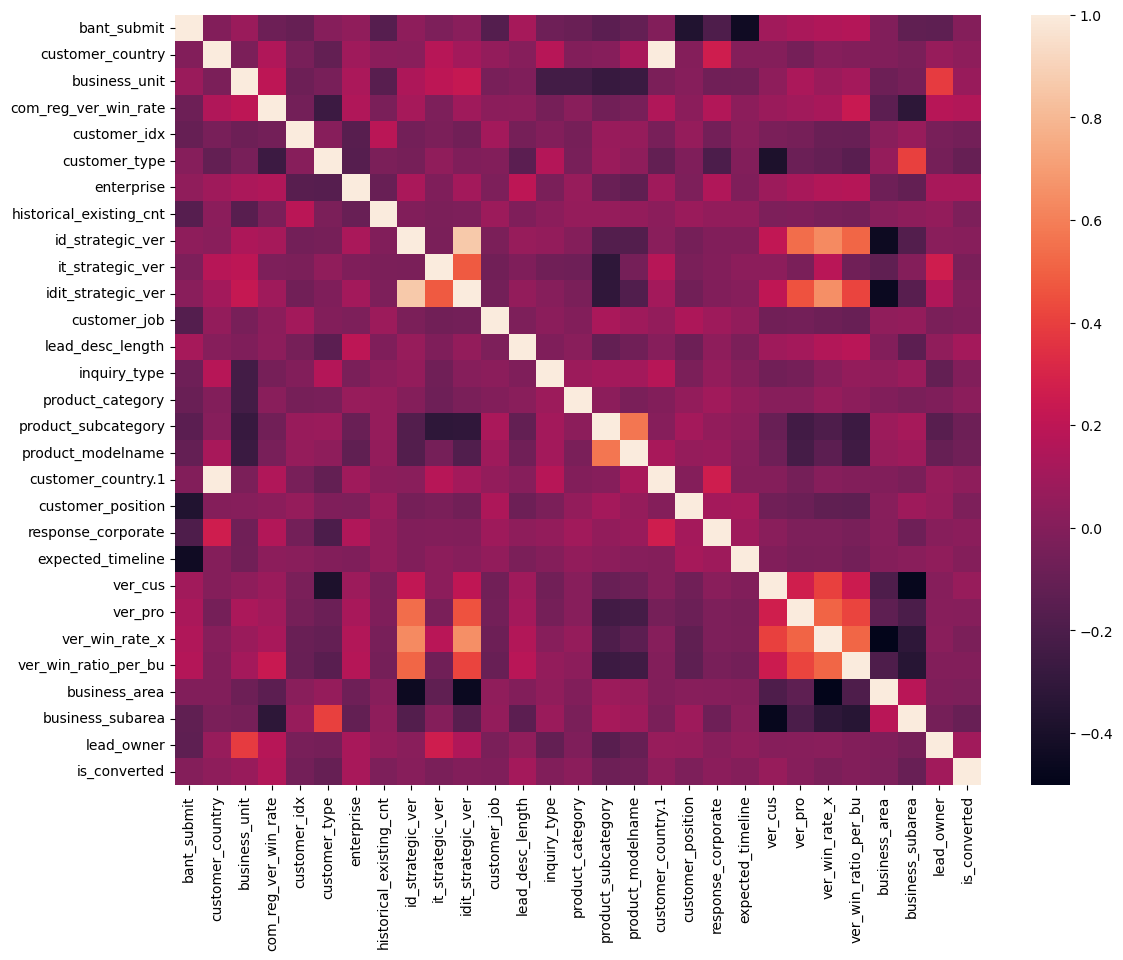

In [15]:
corr = tr_data.corr()

fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(data=corr, ax=ax)

### EDA 결과

**TODO**
- [O] `customer_country` 에서 국가 정보를 제외한 나머지 정보는 제거한다.
- [O] `customer_country.1` feature는 제거한다.
- [O] 결측치 비율이 높은 feature는 제거한다.

**Next**
- 남은 features 의 결측치는 어떻게 채울 것인가?
- imbalanced classification 문제를 어떻게 해결할 것인가?
- `cutomer_idx` feature를 사용할 것인가?
- feature 를 정규화할 것인가?